In [2]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import lsst.eotest.raft as raft
import matplotlib.pyplot as plt
import numpy as np
import yaml
import pyfits

In [54]:
sensor_arr = ['S00','S01','S02','S10','S11','S12','S20','S21','S22']

qe_dict = {}
med_dict = {}
for sensor in sensor_arr:
    path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive/LCA-11021_RTM/LCA-11021_RTM-005/6288/qe_raft_analysis/v0/37123/'+sensor
    f = glob.glob(path+'/*.fits')
    d = pyfits.open(f[0])
    qe_dict[sensor] = d
    f_med = glob.glob(path+'/*.txt')
    med_dict[sensor] = (np.genfromtxt(f_med[0]))


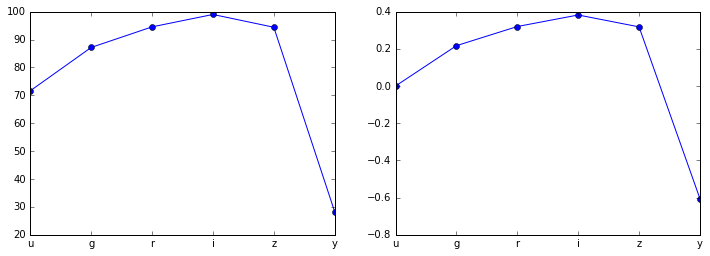

In [4]:
x = range(len(qe_dict['S00'][2].data['BAND']))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].plot(x, qe_dict['S00'][2].data['DEVICE_MEAN'], marker='o')
axes[0].set_xticklabels(qe_dict['S00'][2].data['BAND'])
axes[1].plot(x, qe_dict['S00'][2].data['DEVICE_MEAN']/qe_dict['S00'][2].data['DEVICE_MEAN'][0]-1, marker='o')
axes[1].set_xticklabels(qe_dict['S00'][2].data['BAND'])


In [31]:
mean = np.zeros((len(qe_dict.keys()),len(qe_dict[qe_dict.keys()[0]][2].data['BAND'])))

for i,key in enumerate(sorted(qe_dict.keys())):
    for j,band in enumerate(qe_dict[key][2].data['BAND']):
        mean[i][j] = qe_dict[key][2].data['DEVICE_MEAN'][j]       

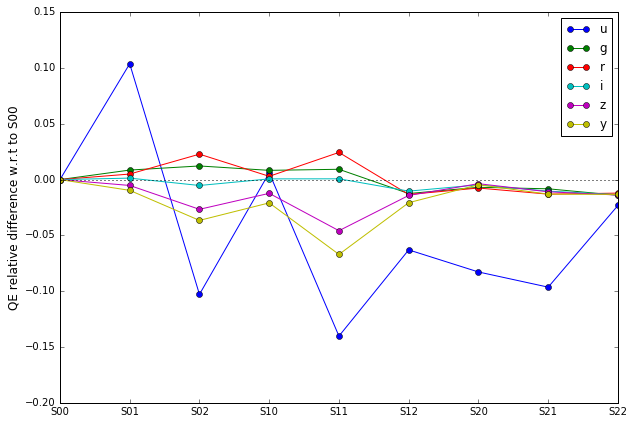

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(qe_dict.keys()))

for j,band in enumerate(qe_dict[key][2].data['BAND']):
    ax.plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o')
ax.set_ylim(-0.20,0.15)
ax.set_ylabel('QE relative difference w.r.t to S00', size='large')
ax.axhline(0.0, color='k', ls=':')
ax.legend()    
fig.savefig('rel_qe_ugriz.png')

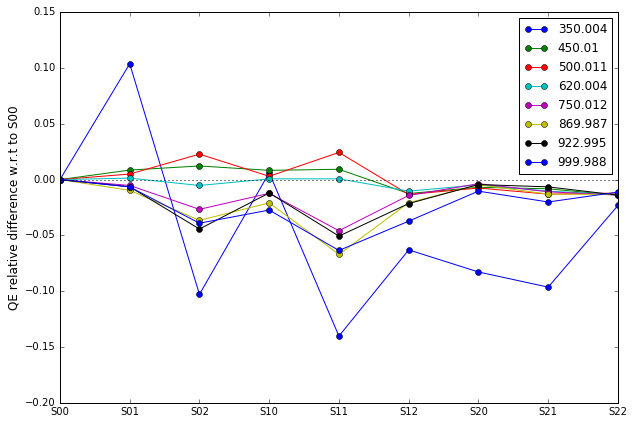

In [41]:
mean = np.zeros((len(qe_dict.keys()),len(qe_dict[key][1].data['WAVELENGTH'])))

for i,key in enumerate(sorted(qe_dict.keys())):
    for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
        mean[i][j] = qe_dict[key][1].data['DEVICE_MEAN'][j]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(qe_dict.keys()))

for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
    ax.plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o')
ax.set_ylim(-0.20,0.15)
ax.set_ylabel('QE relative difference w.r.t to S00', size='large')
ax.axhline(0.0, color='k', ls=':')
ax.legend()    
fig.savefig('rel_qe.png')

In [96]:
seg_rel=np.zeros((len(med_dict), len(med_dict['S00'][:,0]), len(med_dict['S00'][0][3:19])))

for j,slot in enumerate(med_dict): # loop over ccd
    for i in np.arange(len(med_dict[slot][:,0])): # loop over wl
        wl = med_dict[slot][i][0]
        seg_rel[j][i] = ((med_dict[slot][i][3:19]/med_dict[slot][i][3])-1.)*100
np.shape(seg_rel) 

(9, 8, 16)

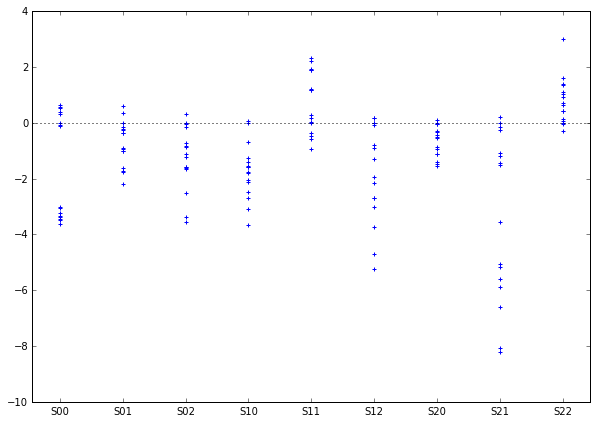

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set_xticklabels(sorted(med_dict.keys()))
ax.set_xticks(np.arange(9))
x = np.arange(9).repeat(16)
ax.axhline(0.0, color='k', ls=':')
ax.scatter(x,seg_rel[:,3,:].ravel(), marker='+')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

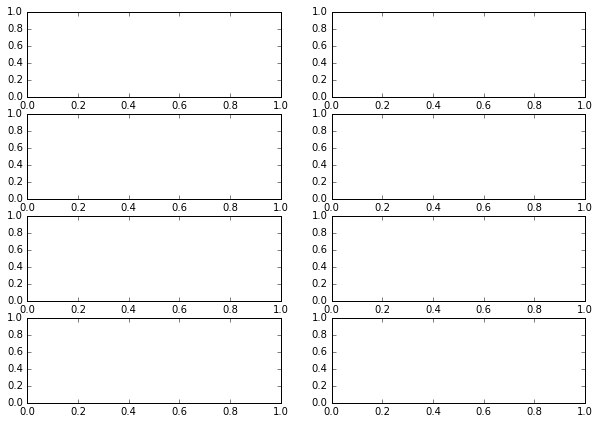

In [102]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,7))
ax.set_xticklabels(sorted(med_dict.keys()))
x = np.arange(16).repeat(9)
for j,band in enumerate(qe_dict[key][1].data['WAVELENGTH']):
    axes[j].plot(mean[:,j]/mean[:,j][0]-1, label=band, marker='o')
    ax.set_ylim(-0.20,0.15)
    ax.set_ylabel('QE relative difference w.r.t to S00', size='large')
    ax.axhline(0.0, color='k', ls=':')
    ax.legend()
    
    
fig.savefig('rel_qe.png')

In [111]:
seg_rel[:,0,:]

array([[ 0.        ,  0.88790884,  1.61951389,  1.68600524,  2.33782255,
         2.01927747,  2.9961506 ,  2.38889697,  0.87734815,  0.53502053,
         0.45699451,  0.48629039, -0.3188247 , -0.75640825, -1.28061182,
        -0.98248905],
       [ 0.        ,  0.19104972,  0.03936402,  0.33621562,  0.09893592,
         1.12084151,  0.65865998,  0.45906617,  2.51327047,  3.12693607,
         3.40709389,  3.20228161,  2.76914556,  2.62918934,  2.73956118,
         2.47413424],
       [ 0.        ,  0.91527906,  1.04666616,  0.6059125 ,  0.28462524,
        -0.15959554, -0.80881854, -0.85922741,  2.9880201 ,  2.87888114,
         2.51990495,  2.53660029,  2.11884111,  2.87545098,  1.76156418,
         1.1536878 ],
       [ 0.        ,  0.14225807, -1.44048584, -1.81180649, -2.31012298,
        -2.05160337, -2.65312717, -4.40885591, -3.74059757, -2.28980779,
        -2.38700226, -1.38771794, -1.28143328, -0.83919017, -1.50311007,
        -0.19595567],
       [ 0.        ,  0.31738059,  0

In [106]:
x

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
       15, 15, 15, 15, 15, 15, 15, 15])